In [52]:
#importing important package
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime

In [53]:
#loading the data as a dataframe
uber=pd.read_csv(r"C:\Users\mr220\Documents\upgrad\Mentorship project\Dataset_Predict The Fare Amount Of Future Rides Using Regression Analysis\uber.csv")

In [54]:
#for displaying all the columns 
pd.set_option("display.max_columns",None)

In [55]:
uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# getting the information

In [56]:
#shape
uber.shape

(200000, 9)

In [57]:
#columns
uber.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [58]:
#info
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [59]:
#describe
uber.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [60]:
#unique value 
uber.nunique().sort_values()

passenger_count           8
fare_amount            1244
pickup_longitude      71066
dropoff_longitude     76894
pickup_latitude       83835
dropoff_latitude      90585
pickup_datetime      196629
Unnamed: 0           200000
key                  200000
dtype: int64

In [61]:
#dropping columns which are of no use
'''Unnamed: 0  and key both the columns are of no use for the model '''
uber=uber.drop(columns=["Unnamed: 0","key"],axis=1)

In [62]:
uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# looking for null values

In [63]:
uber.isnull().sum()*100/len(uber)

fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64

In [64]:
"""here we can observe that the null values percent are so less, therefore we can drop the values."""

'here we can observe that the null values percent are so less, therefore we can drop the values.'

In [65]:
#dropping the nulls
uber = uber.dropna(subset=["dropoff_longitude", "dropoff_latitude"])


In [66]:
#checking the dataframe again for nulls
uber.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [67]:
"""now there is no null values left"""

'now there is no null values left'

# outliers handling

In [68]:
# Select only numerical columns
numerical_cols = uber.select_dtypes(include=["float64", "int64"]).columns


# Loop through numerical columns
for col in numerical_cols:
    Q1 = uber[col].quantile(0.25)  # 25th percentile
    Q3 = uber[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                  # Interquartile Range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    uber = uber[(uber[col] >= lower_bound) & (uber[col] <= upper_bound)]

    


# feature engineering

In [69]:
#creating year,month,day,hour,day_type from pickup_datetime

#coverting pickup_datetime data type
uber["pickup_datetime"]=pd.to_datetime(uber["pickup_datetime"])

# creating features
uber["year"]=uber["pickup_datetime"].dt.year
uber["month"]=uber["pickup_datetime"].dt.month
uber["day"]=uber["pickup_datetime"].dt.day_name()
uber["hour"]=uber["pickup_datetime"].dt.hour
uber["day_type"]=uber["day"].apply([lambda x: "weekend" if x in ["Saturday","Sunday"] else "weekday"])

In [70]:
#checking new columns in the dataframe
uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_type
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,Thursday,19,weekday
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,Friday,20,weekday
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,Monday,21,weekday
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,Friday,8,weekday
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,Saturday,2,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1,2014,1,Friday,14,weekday
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,Sunday,10,weekend
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,Friday,1,weekday
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,Wednesday,14,weekday


In [71]:
#now we can drop pickup_datetime
uber.drop(columns="pickup_datetime",inplace=True)

In [72]:
#creating feature time_of_day 
#lets create a function

def time_of_day(hour):
    '''this function will create time of the day accordingly'''
    if 5<= hour <12 :
        return "morning"
    elif 12<= hour <17 :
        return "afternoon"
    elif 17<= hour < 21 :
        return "evening"
    else:
        return "night"
        

In [73]:
#creating feature
uber["time_of_day"]=uber["hour"].apply(time_of_day)

In [74]:
#checking dataframe
uber


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_type,time_of_day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,Thursday,19,weekday,evening
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,Friday,20,weekday,evening
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,Monday,21,weekday,night
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,Friday,8,weekday,morning
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,Saturday,2,weekend,night
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1,2014,1,Friday,14,weekday,afternoon
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,Sunday,10,weekend,morning
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,Friday,1,weekday,night
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,Wednesday,14,weekday,afternoon


In [75]:
#lets create total distance travel

'''let us first make some variables to treat any outliers'''
min_lat=-90 #minimum latitude
max_lat=90 #maximum latitude
min_long=-180 #minimum longitude
max_long=180 #maximum longitude

uber=uber[(uber["pickup_longitude"]>=min_long)&(uber["pickup_longitude"]<=max_long)]
uber=uber[(uber["pickup_latitude"]>=min_lat)&(uber["pickup_latitude"]<=max_lat)]
uber=uber[(uber["dropoff_longitude"]>=min_long)&(uber["dropoff_longitude"]<=max_long)]
uber=uber[(uber["dropoff_latitude"]>=min_lat)&(uber["dropoff_latitude"]<=max_lat)]

#creating feature distance travel
from geopy.distance import geodesic

# Calculate the distance in km using geopy
uber['distance_km'] = uber.apply(
    lambda row: geodesic(
        (row['pickup_latitude'], row['pickup_longitude']),
        (row['dropoff_latitude'], row['dropoff_longitude'])
    ).kilometers, axis=1
)

In [76]:
uber

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_type,time_of_day,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,Thursday,19,weekday,evening,1.681111
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,Friday,20,weekday,evening,2.454363
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,Monday,21,weekday,night,5.039603
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,Friday,8,weekday,morning,1.661442
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,Saturday,2,weekend,night,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1,2014,1,Friday,14,weekday,afternoon,1.123897
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,Sunday,10,weekend,morning,0.112128
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,Friday,1,weekday,night,1.879635
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,Wednesday,14,weekday,afternoon,3.536552


In [77]:
# lets create season feature
def season(month):
    '''this function will create seasons accordingly'''
    if month in [3,4,5,6]:
        return "summer"
    elif month in [7,8,9,10]:
        return "rainy"
    else:
        return "winter"
    

In [78]:
uber["season"]=uber["month"].apply(season)

In [79]:
#checling dataframe
uber

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_type,time_of_day,distance_km,season
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,Thursday,19,weekday,evening,1.681111,summer
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,Friday,20,weekday,evening,2.454363,rainy
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,Monday,21,weekday,night,5.039603,rainy
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,Friday,8,weekday,morning,1.661442,summer
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,Saturday,2,weekend,night,0.000000,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1,2014,1,Friday,14,weekday,afternoon,1.123897,winter
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,Sunday,10,weekend,morning,0.112128,rainy
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,Friday,1,weekday,night,1.879635,summer
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,Wednesday,14,weekday,afternoon,3.536552,summer


In [80]:
#lets create duration
'''long,short,medium,verylong'''

#firstly lets drop values, distance_km ==0 and passenger_count==0 and fare_amount<=0 because this will effect our model accuracy
uber=uber[uber["distance_km"]>0]
uber=uber[uber["passenger_count"]>0]
uber=uber[uber["fare_amount"]>0]

In [81]:
def Duration(distance_km):
    if distance_km <= 10:
        return "short"
    elif distance_km <=80:
        return "medium"
    elif distance_km <=180:
        return "long"
    else:
        return "verylong"
    

In [82]:
#now lets create feature
uber["duration"]=uber["distance_km"].apply(Duration)

In [83]:
# checking dataframe
uber

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_type,time_of_day,distance_km,season,duration
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,Thursday,19,weekday,evening,1.681111,summer,short
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,Friday,20,weekday,evening,2.454363,rainy,short
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,Monday,21,weekday,night,5.039603,rainy,short
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,Friday,8,weekday,morning,1.661442,summer,short
8,9.7,-73.975187,40.745767,-74.002720,40.743537,1,2012,2,Friday,9,weekday,morning,2.338560,winter,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1,2014,1,Friday,14,weekday,afternoon,1.123897,winter,short
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,Sunday,10,weekend,morning,0.112128,rainy,short
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,Friday,1,weekday,night,1.879635,summer,short
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,Wednesday,14,weekday,afternoon,3.536552,summer,short


In [84]:
max(uber["distance_km"])

12.328147111827661

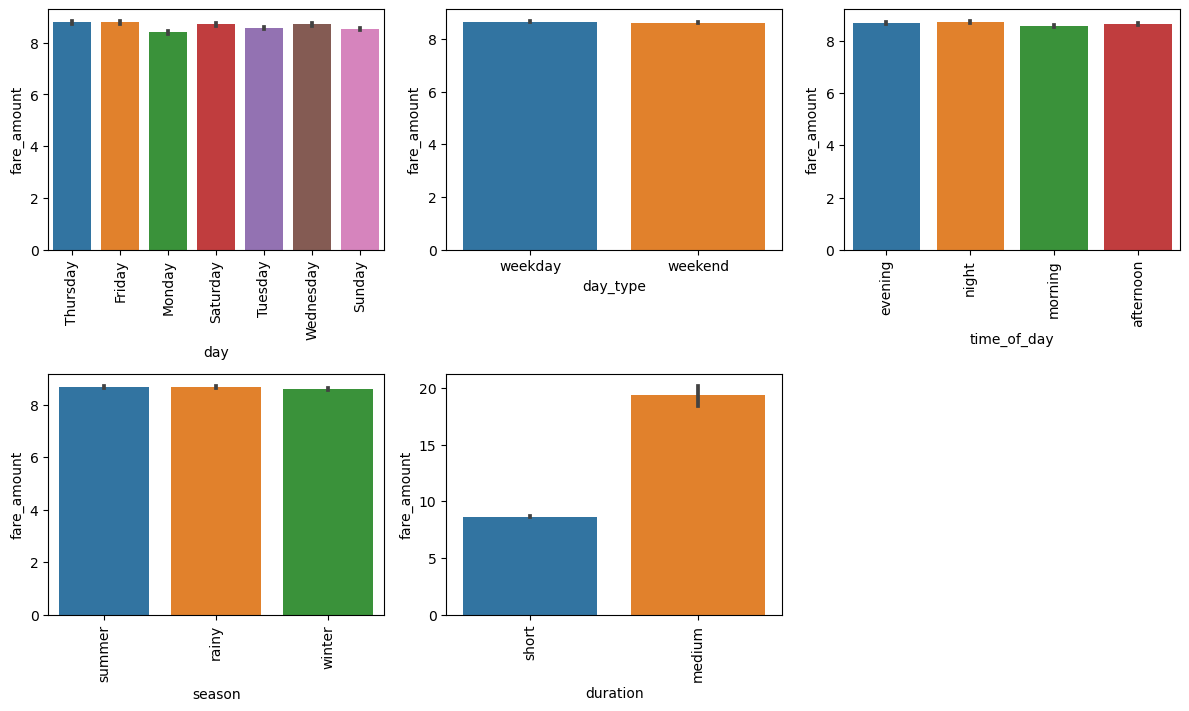

In [85]:
#visualising categorical data
plt.figure(figsize=(12,10))

plt.subplot(3,3,1)
sns.barplot(data=uber,x="day",y="fare_amount")
plt.xticks(rotation=90)
           
plt.subplot(3,3,2)
sns.barplot(data=uber,x="day_type",y="fare_amount")

plt.subplot(3,3,3)
sns.barplot(data=uber,x="time_of_day",y="fare_amount")
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.barplot(data=uber,x="season",y="fare_amount")
plt.xticks(rotation=90)


plt.subplot(3,3,5)
sns.barplot(data=uber,x="duration",y="fare_amount")
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

In [86]:
#observation
"""
Fare Amount by Day: The average fare amount remains consistent across all days of the week.
Fare Amount by Day Type: Fares are nearly identical between weekdays and weekends.
Fare Amount by Time of Day: No significant variation in fare amount is observed across different times of the day.
Fare Amount by Season: Fares are consistent across summer, rainy, and winter seasons.
Fare Amount by Duration: Medium-duration trips have significantly higher fares compared to short-duration trips.
"""

'\nFare Amount by Day: The average fare amount remains consistent across all days of the week.\nFare Amount by Day Type: Fares are nearly identical between weekdays and weekends.\nFare Amount by Time of Day: No significant variation in fare amount is observed across different times of the day.\nFare Amount by Season: Fares are consistent across summer, rainy, and winter seasons.\nFare Amount by Duration: Medium-duration trips have significantly higher fares compared to short-duration trips.\n'

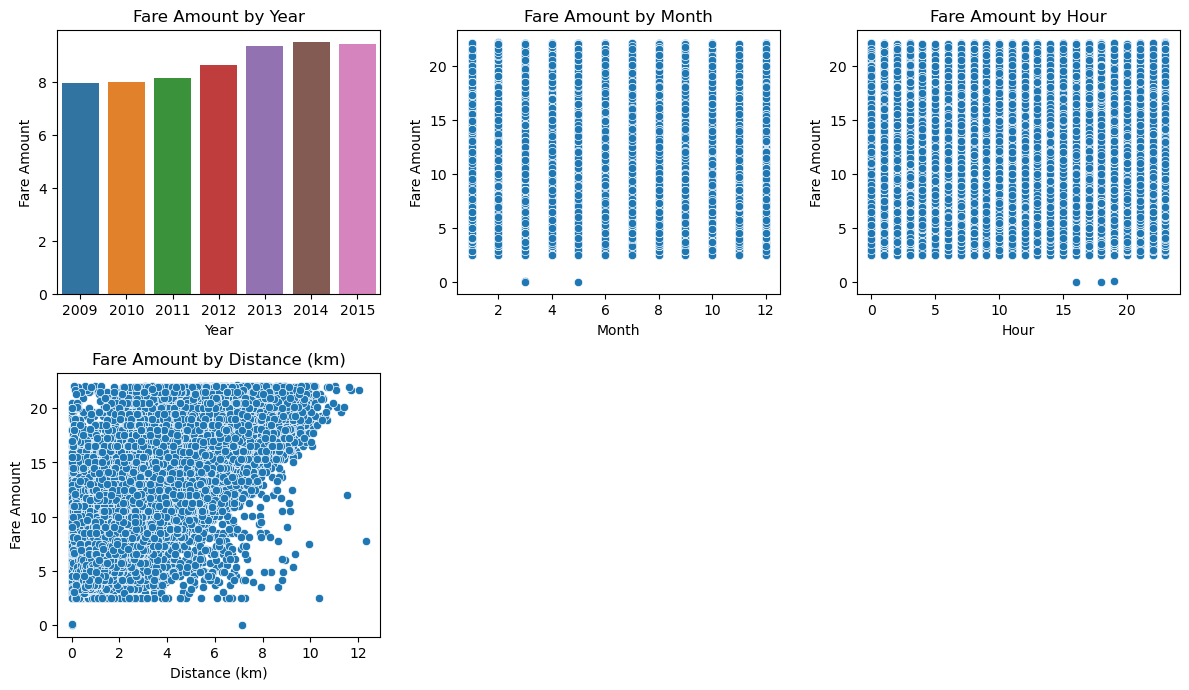

In [87]:
#visualising numerical columns



plt.figure(figsize=(12, 10))

# Subplot 1: Bar plot of fare_amount by year
plt.subplot(3, 3, 1)
sns.barplot(data=uber, x="year", y="fare_amount", ci=None)  # x should be categorical or discrete
plt.title("Fare Amount by Year")
plt.xlabel("Year")
plt.ylabel("Fare Amount")

# Subplot 2: Scatter plot of fare_amount by month
plt.subplot(3, 3, 2)
sns.scatterplot(data=uber, x="month", y="fare_amount")
plt.title("Fare Amount by Month")
plt.xlabel("Month")
plt.ylabel("Fare Amount")

# Subplot 3: Scatter plot of fare_amount by hour
plt.subplot(3, 3, 3)
sns.scatterplot(data=uber, x="hour", y="fare_amount")
plt.title("Fare Amount by Hour")
plt.xlabel("Hour")
plt.ylabel("Fare Amount")

# Subplot 4: Scatter plot of fare_amount by distance_km
plt.subplot(3, 3, 4)
sns.scatterplot(data=uber, x="distance_km", y="fare_amount")
plt.title("Fare Amount by Distance (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount")

plt.tight_layout()
plt.show()


In [88]:
#observation
'''Fare Amount by Year: The average fare amount has remained consistent across the years, with a slight upward trend.
Fare Amount by Month: Fares appear uniformly distributed across all months, with no significant seasonal variation.
Fare Amount by Hour: Fare amounts are scattered throughout the day, suggesting consistent demand across hours.
Fare Amount by Distance: Fare increases linearly with distance, as expected, but outliers exist for short distances with higher fares.'''

'Fare Amount by Year: The average fare amount has remained consistent across the years, with a slight upward trend.\nFare Amount by Month: Fares appear uniformly distributed across all months, with no significant seasonal variation.\nFare Amount by Hour: Fare amounts are scattered throughout the day, suggesting consistent demand across hours.\nFare Amount by Distance: Fare increases linearly with distance, as expected, but outliers exist for short distances with higher fares.'

# one hot encoding 


In [89]:
#importing 
from sklearn.preprocessing import OneHotEncoder

In [90]:
# Define the categorical features
cat_feature = ["day", "day_type", "time_of_day", "season", "duration"]

# Initialize the encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  

# Fit and transform the categorical features
encoded_features = encoder.fit_transform(uber[cat_feature])


# making it a dataframe
encode_df=pd.DataFrame(encoded_features,columns=encoder.get_feature_names_out(cat_feature))

In [91]:
# Concatenate the encoded features back to the original DataFrame
uber = pd.concat([uber.reset_index(drop=True), encode_df.reset_index(drop=True)], axis=1)

In [92]:
#droping all the categorical variables 
uber=uber.drop(columns=cat_feature)

In [93]:
#checking data
uber

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,distance_km,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_type_weekend,time_of_day_evening,time_of_day_morning,time_of_day_night,season_summer,season_winter,duration_short
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,19,1.681111,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,20,2.454363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,21,5.039603,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,8,1.661442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,9.7,-73.975187,40.745767,-74.002720,40.743537,1,2012,2,9,2.338560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146226,12.0,-73.983070,40.760770,-73.972972,40.754177,1,2014,1,14,1.123897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
146227,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,10,0.112128,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
146228,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,1,1.879635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
146229,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,14,3.536552,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# splitting the data

In [94]:
#importing
from sklearn.model_selection import train_test_split

In [95]:
#creating variable x and y
x=uber.drop(columns='fare_amount')    #all the features 
y=uber["fare_amount"]                 #Target variable

In [96]:
#Splitting into train and test
xtrain,xtest,ytrain,ytest=train_test_split(x, y, train_size=0.7 ,test_size=0.3 ,random_state=100)

In [97]:
#checking shape of all variables
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(102361, 22)
(43870, 22)
(102361,)
(43870,)


# scaling 

In [98]:
#importing
from sklearn.preprocessing import StandardScaler

In [99]:
#fitting and transforming
scaler=StandardScaler()

xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.transform(xtest)

# correlation analysis

In [100]:
#checking correlation for all with target variable
uber.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,distance_km,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_type_weekend,time_of_day_evening,time_of_day_morning,time_of_day_night,season_summer,season_winter,duration_short
fare_amount,1.000000,-0.052313,-0.076884,-0.022574,-0.094895,0.018130,0.155229,0.028459,0.006122,0.812740,-0.024306,0.005889,-0.012417,0.014948,-0.008913,0.007043,-0.004509,0.002701,-0.015276,0.011308,0.005235,-0.011805,-0.052389
pickup_longitude,-0.052313,1.000000,0.696251,0.401575,0.352626,-0.023494,-0.001620,-0.002298,0.013309,-0.046082,0.009943,-0.019540,-0.026274,0.003953,0.014412,0.017225,-0.035106,0.010261,0.058689,-0.113910,0.001760,0.014785,-0.001926
pickup_latitude,-0.076884,0.696251,1.000000,0.333239,0.495485,-0.019845,-0.001387,0.002883,0.034281,-0.069892,0.019039,-0.034747,-0.033244,0.005199,0.021081,0.021437,-0.052426,0.017629,0.063455,-0.145843,0.004177,0.012556,-0.001459
dropoff_longitude,-0.022574,0.401575,0.333239,1.000000,0.653449,-0.016507,0.005819,-0.004253,0.000012,0.017536,0.007338,-0.024182,-0.011889,0.006635,0.014397,0.013533,-0.028140,-0.000229,-0.007399,-0.009032,0.006264,0.012118,0.000014
dropoff_latitude,-0.094895,0.352626,0.495485,0.653449,1.000000,-0.012822,0.001757,0.000310,0.026237,-0.038730,0.013558,-0.031839,-0.018551,0.008062,0.017930,0.016520,-0.039201,0.014096,0.021799,-0.089070,0.005087,0.010969,-0.000708
passenger_count,0.018130,-0.023494,-0.019845,-0.016507,-0.012822,1.000000,-0.025030,0.005997,0.034497,0.013719,-0.017216,0.057882,0.039959,-0.026473,-0.023580,-0.029386,0.075891,0.024435,-0.083156,0.065705,-0.003073,0.002466,0.003235
year,0.155229,-0.001620,-0.001387,0.005819,0.001757,-0.025030,1.000000,-0.113939,0.005531,-0.022179,0.005774,0.005974,0.008629,-0.007340,-0.009556,0.000432,0.011175,-0.003873,0.002621,0.002298,0.083456,0.000691,0.012705
month,0.028459,-0.002298,0.002883,-0.004253,0.000310,0.005997,-0.113939,1.000000,-0.003059,0.002613,0.006488,-0.002338,-0.004124,-0.001731,0.005134,0.001227,-0.004928,-0.002936,-0.001682,0.008019,-0.395828,-0.017353,0.001488
hour,0.006122,0.013309,0.034281,0.000012,0.026237,0.034497,0.005531,-0.003059,1.000000,-0.014848,0.023647,-0.012797,-0.094422,0.020438,0.031483,0.019960,-0.080285,0.433750,-0.454131,0.008072,0.002159,0.002897,0.008640
distance_km,0.812740,-0.046082,-0.069892,0.017536,-0.038730,0.013719,-0.022179,0.002613,-0.014848,1.000000,-0.009551,0.023408,0.030196,-0.007427,-0.016338,-0.013350,0.041106,-0.010783,-0.025780,0.100543,0.007706,-0.017987,-0.096288


<Axes: >

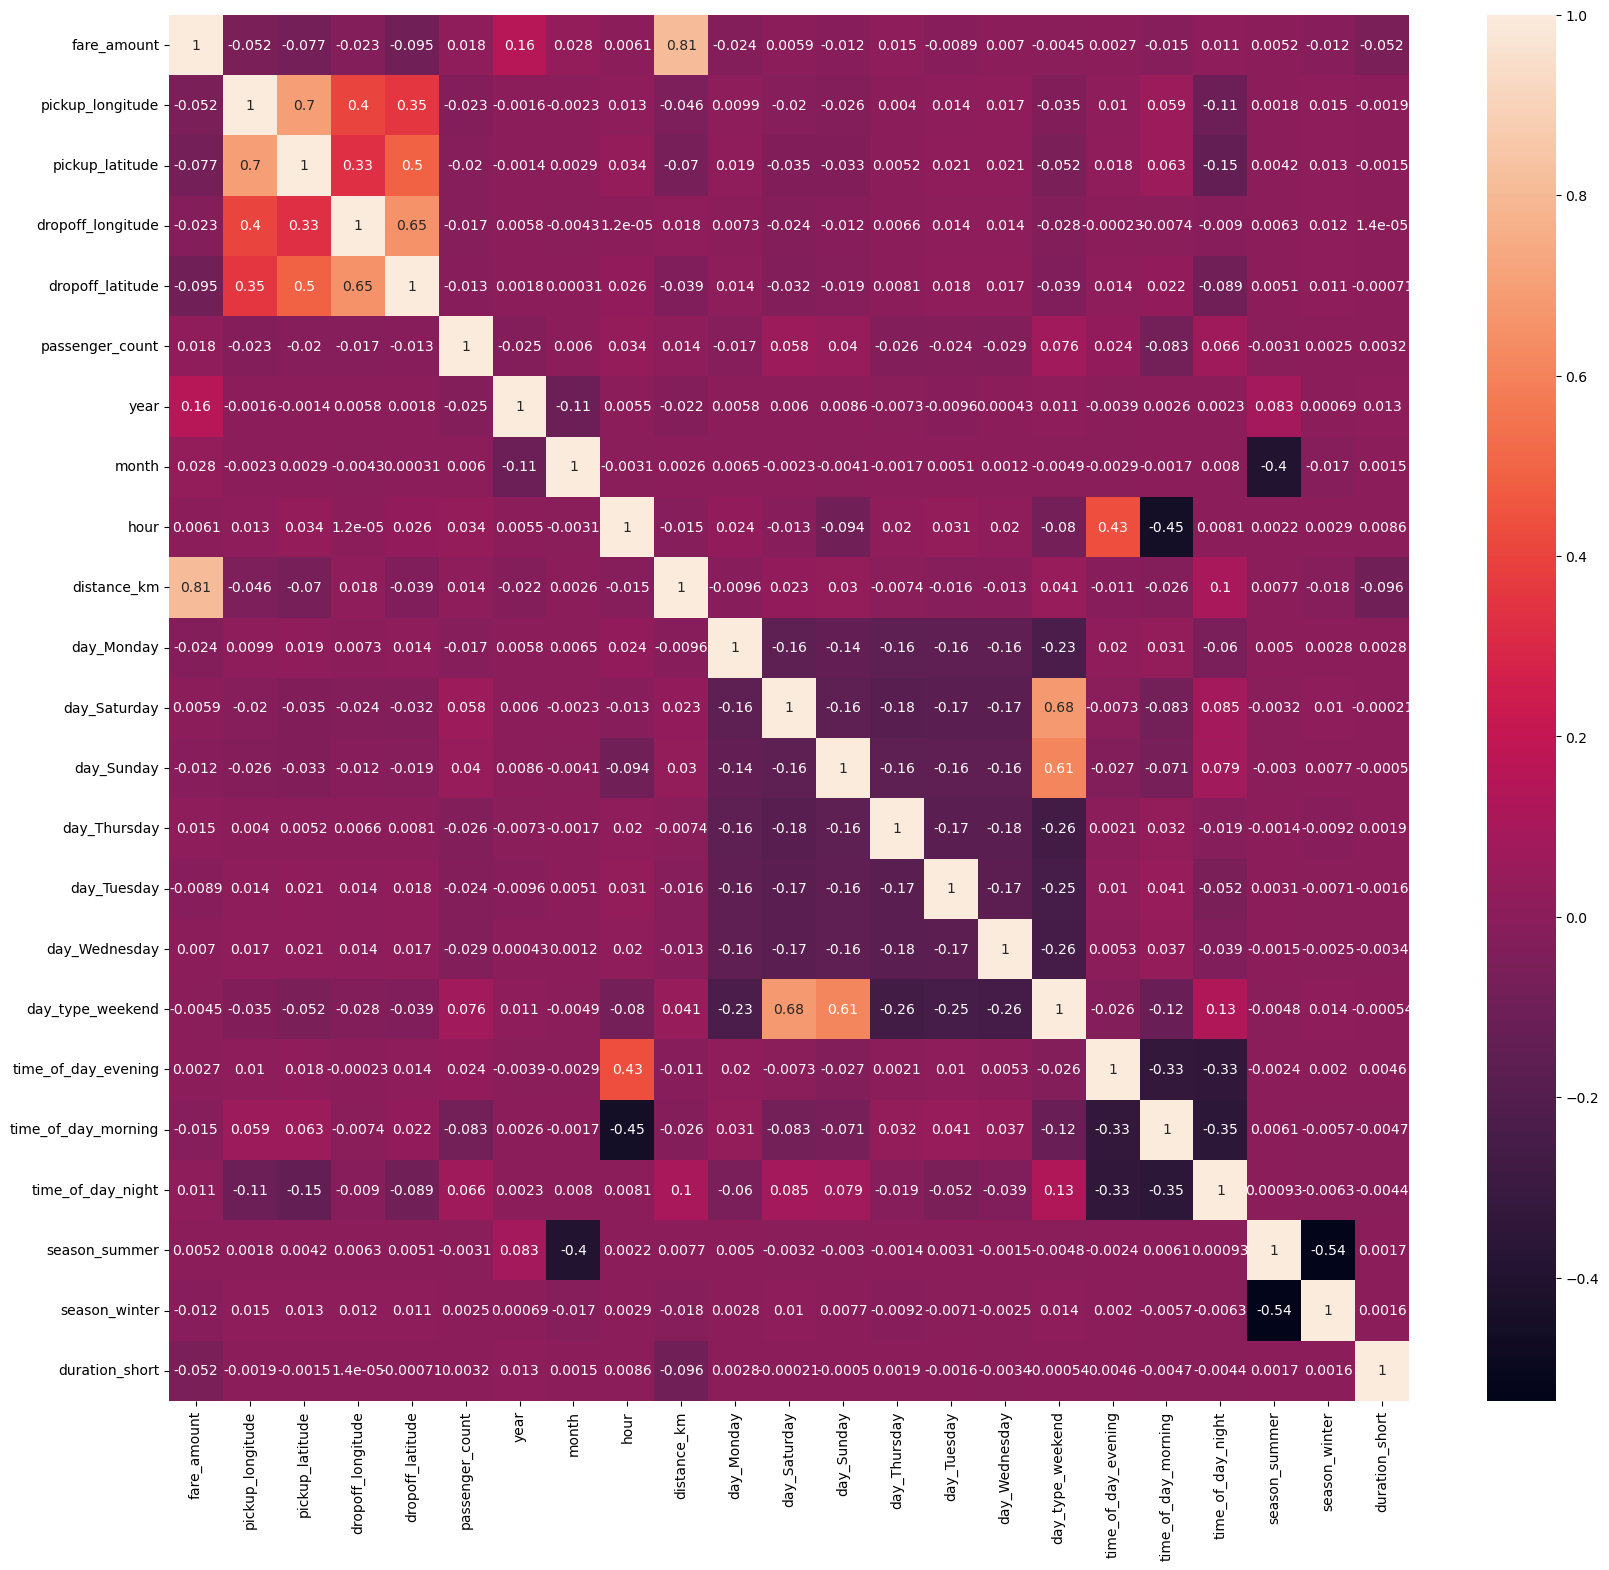

In [101]:
#lets plot a heatmap
plt.figure(figsize=(20,18))
sns.heatmap(uber.corr(),annot=True)


In [102]:
#observation
'''
Strong Positive Correlations:

Distance and Fare Amount: The longer the distance, the higher the fare amount.

Very Long Duration and Distance: Very long trips cover significant distances.

Strong Negative Correlations:

Short Duration and Distance : Short trips cover shorter distances.

Short Duration and Very Long Duration: Short trips are highly negatively correlated with very long trips.
'''

'\nStrong Positive Correlations:\n\nDistance and Fare Amount: The longer the distance, the higher the fare amount.\n\nVery Long Duration and Distance: Very long trips cover significant distances.\n\nStrong Negative Correlations:\n\nShort Duration and Distance : Short trips cover shorter distances.\n\nShort Duration and Very Long Duration: Short trips are highly negatively correlated with very long trips.\n'